Note: mediapipe works on 3.7-3.10, you may have to change your python version to get this to work. 

Handedness: [classification {
  index: 0
  score: 0.9991753101348877
  label: "Left"
}
]
hand_landmarks: landmark {
  x: 0.6059426069259644
  y: 0.7265229225158691
  z: -6.582251330655708e-07
}
landmark {
  x: 0.6891137957572937
  y: 0.6842793226242065
  z: -0.06556226313114166
}
landmark {
  x: 0.7445803880691528
  y: 0.5940148830413818
  z: -0.09982538223266602
}
landmark {
  x: 0.7083438038825989
  y: 0.5131451487541199
  z: -0.12622548639774323
}
landmark {
  x: 0.6412017941474915
  y: 0.4609811305999756
  z: -0.13804039359092712
}
landmark {
  x: 0.6682268381118774
  y: 0.49107417464256287
  z: -0.053906578570604324
}
landmark {
  x: 0.7232473492622375
  y: 0.4474082589149475
  z: -0.1209941953420639
}
landmark {
  x: 0.7282992601394653
  y: 0.5240723490715027
  z: -0.14036360383033752
}
landmark {
  x: 0.7012209296226501
  y: 0.5390315651893616
  z: -0.14879965782165527
}
landmark {
  x: 0.585707426071167
  y: 0.49758219718933105
  z: -0.05472484603524208
}
landmark {
  x: 0.6389

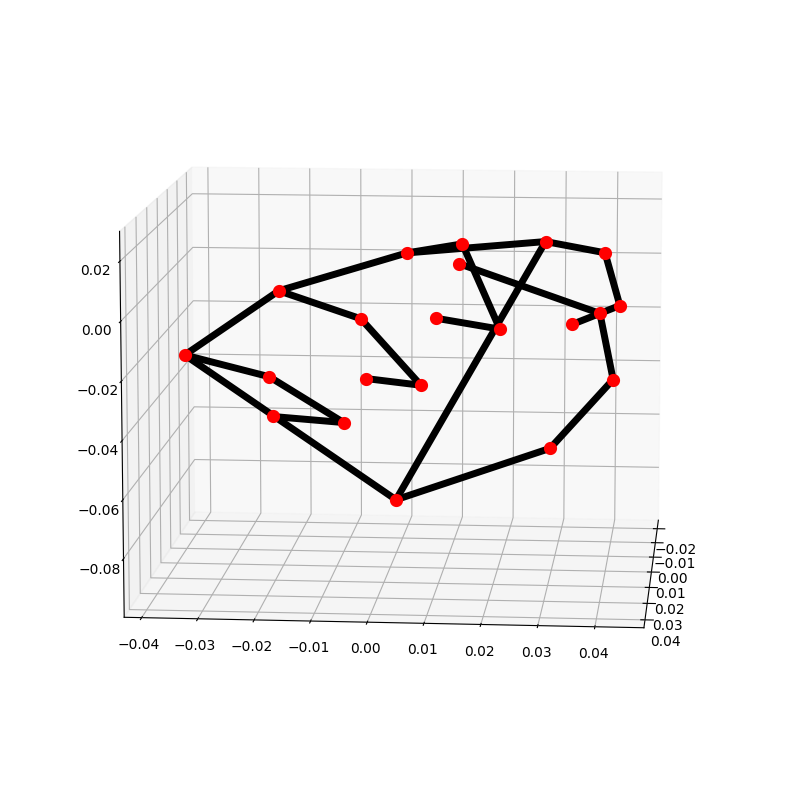

In [4]:
import cv2 
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For static images:
IMAGE_FILES = ['IMG_2685.jpg']
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    cv2.imwrite(
        '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
    # Draw hand world landmarks.
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()